TASK 1:

Epoch 1/50


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5544 - loss: 0.6973 - val_accuracy: 0.7128 - val_loss: 0.5923
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6602 - loss: 0.6368 - val_accuracy: 0.7340 - val_loss: 0.5545
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6991 - loss: 0.6239 - val_accuracy: 0.7234 - val_loss: 0.5328
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6435 - loss: 0.6221 - val_accuracy: 0.7234 - val_loss: 0.5176
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7036 - loss: 0.5652 - val_accuracy: 0.7234 - val_loss: 0.5095
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6733 - loss: 0.5673 - val_accuracy: 0.7234 - val_loss: 0.5038
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6479 - loss: 0.6078 - val_accuracy: 0.7234 - val_loss: 0.5024
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7211 - loss: 0.5322 - val_accuracy: 0.7234 - val_loss: 0.4999
Epo

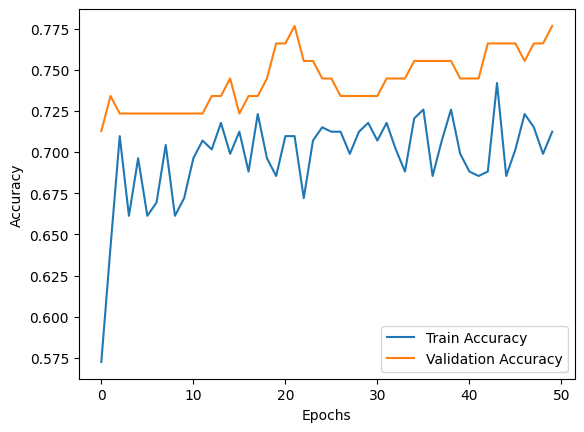

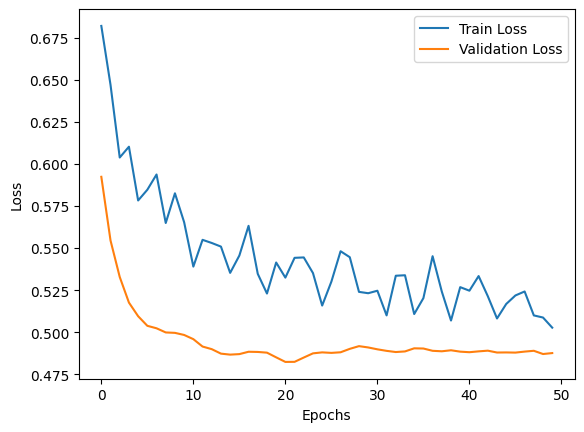

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from keras.api.models import Sequential
from keras.api.layers import Dense, Dropout
from keras.api.utils import to_categorical
from sklearn.metrics import classification_report, accuracy_score

# Load dataset
data = pd.read_csv('indian_liver_patient.csv')

# Preprocessing
# Handle categorical variable 'Gender'
data['Gender'] = LabelEncoder().fit_transform(data['Gender'])

# Handle missing values in 'Albumin_and_Globulin_Ratio'
data['Albumin_and_Globulin_Ratio'] = data['Albumin_and_Globulin_Ratio'].fillna(data['Albumin_and_Globulin_Ratio'].mean())

# Split data into features and target
X = data.drop('DiseaseStatus', axis=1)
y = data['DiseaseStatus']

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Convert target to categorical
y = to_categorical(y - 1)  # Subtract 1 to make labels start from 0

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build fully connected feed-forward network
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(y.shape[1], activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

print("Classification Report:")
print(classification_report(y_true, y_pred))
print("Accuracy:", accuracy_score(y_true, y_pred))

# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


TASK 2:    Згорткові нейронні мережі (CNN)

https://www.kaggle.com/datasets/niteshfre/chessman-image-dataset?resource=download

Found 238 images belonging to 3 classes.
Found 59 images belonging to 3 classes.


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 556ms/step - accuracy: 0.3744 - loss: 1.4240 - val_accuracy: 0.4068 - val_loss: 1.0908
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 515ms/step - accuracy: 0.3679 - loss: 1.0856 - val_accuracy: 0.3559 - val_loss: 1.0881
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 529ms/step - accuracy: 0.4685 - loss: 1.0352 - val_accuracy: 0.3559 - val_loss: 1.0903
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 401ms/step - accuracy: 0.5399 - loss: 0.9693 - val_accuracy: 0.5593 - val_loss: 0.9696
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 433ms/step - accuracy: 0.6801 - loss: 0.8034 - val_accuracy: 0.5763 - val_loss: 1.0874
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 403ms/step - accuracy: 0.6824 - loss: 0.6825 - val_accuracy: 0.6102 - val_loss: 0.8131
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 457ms/step - accuracy: 0.8003 - loss: 0.4994 - val_accuracy: 0.5932 - val_loss: 0.9204
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 518ms/step - accuracy: 0.8371 - loss: 0.4588 - val_accuracy: 0.6271 - val_loss:

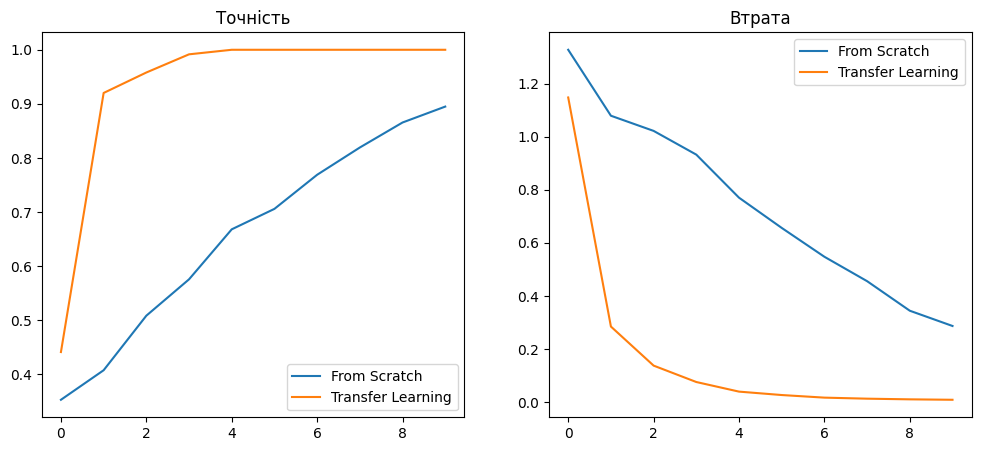

Model from Scratch:
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 258ms/step - accuracy: 0.6690 - loss: 1.0768
Model with Transfer Learning:
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 247ms/step - accuracy: 0.9557 - loss: 0.1211


[0.1387232393026352, 0.9491525292396545]

In [3]:
import tensorflow as tf
from keras.api import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.api.applications import MobileNetV2
import matplotlib.pyplot as plt

# Параметри
image_size = (128, 128)
batch_size = 32
classes = ['Bishop', 'Knight', 'Pawn']  # Вибрані класи

data_dir = './task2/Chess/'  # Директорія з даними

# Завантаження даних
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    validation_split=0.2
)

train_data = train_datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    classes=classes,
    subset='training'
)

val_data = train_datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    classes=classes,
    subset='validation'
)

# 1. Мережа з нуля
model_scratch = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(classes), activation='softmax')
])

model_scratch.compile(optimizer='adam', 
                      loss='categorical_crossentropy', 
                      metrics=['accuracy'])

history_scratch = model_scratch.fit(train_data, 
                                    validation_data=val_data, 
                                    epochs=10)

# 2. Перенесення навчання
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
base_model.trainable = False

model_transfer = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(classes), activation='softmax')
])

model_transfer.compile(optimizer='adam', 
                       loss='categorical_crossentropy', 
                       metrics=['accuracy'])

history_transfer = model_transfer.fit(train_data, 
                                      validation_data=val_data, 
                                      epochs=10)

# Порівняння результатів
plt.figure(figsize=(12, 5))

# Точність
plt.subplot(1, 2, 1)
plt.plot(history_scratch.history['accuracy'], label='From Scratch')
plt.plot(history_transfer.history['accuracy'], label='Transfer Learning')
plt.title('Точність')
plt.legend()

# Втрата
plt.subplot(1, 2, 2)
plt.plot(history_scratch.history['loss'], label='From Scratch')
plt.plot(history_transfer.history['loss'], label='Transfer Learning')
plt.title('Втрата')
plt.legend()

plt.show()

# Оцінка моделей
print("Model from Scratch:")
model_scratch.evaluate(val_data)

print("Model with Transfer Learning:")
model_transfer.evaluate(val_data)


TASK 3:

Розподіл класів після балансування:
Sentiment
2    2186
4    1256
3     929
1       1
Name: count, dtype: int64
Навчання моделі з нуля...
Epoch 1/10


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4443 - loss: 1.4741 - val_accuracy: 0.5057 - val_loss: 1.1517
Epoch 2/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4897 - loss: 1.1182 - val_accuracy: 0.5057 - val_loss: 1.0229
Epoch 3/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4974 - loss: 1.0159 - val_accuracy: 0.6271 - val_loss: 0.9318
Epoch 4/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6584 - loss: 0.8624 - val_accuracy: 0.7457 - val_loss: 0.7099
Epoch 5/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8266 - loss: 0.5913 - val_accuracy: 0.7943 - val_loss: 0.5736
Epoch 6/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8973 - loss: 0.3911 - val_accuracy: 0.7886 - val_loss: 0.5408
Epoch 7/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9302 - loss: 0.2789 - val_accuracy: 0.8129 - val_loss: 0.5449
Epoch 8/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9371 - loss: 0.2305 - val_accuracy: 0.8000 - val_loss: 0.5356
Epo

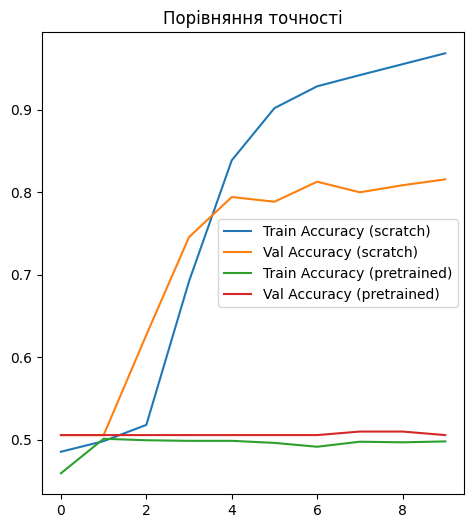

In [4]:
import pandas as pd
import string
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
import matplotlib.pyplot as plt

# Завантаження набору даних
data = pd.read_csv('text.csv')  # Переконайтеся, що файл 'dataset.csv' існує

# Очищення тексту
def cleaning(value):
    punctuation_cleaning = []
    stopwords_cleaning_string = ''
    
    for i in value:
        if i not in string.punctuation:
            punctuation_cleaning.append(i)
    punctuation_cleaning = "".join(punctuation_cleaning).split()
    
    # Видалення стоп-слів (список можна розширити)
    stopwords_list = ["a", "an", "the", "in", "on", "at", "is", "it", "and", "to", "of"]
    for j in punctuation_cleaning:
        if j.lower() not in stopwords_list:
            stopwords_cleaning_string += j.lower() + ' '
    
    return stopwords_cleaning_string

data['Cleaned_Text'] = data['Text'].apply(cleaning)

# Кодування міток
label_encoder = LabelEncoder()
data['Sentiment'] = label_encoder.fit_transform(data['Sentiment'])

# Балансування класів
majority_class = data[data['Sentiment'] == data['Sentiment'].value_counts().idxmax()]
minority_classes = data[data['Sentiment'] != data['Sentiment'].value_counts().idxmax()]

# Перевибірка міноритарних класів
minority_classes_resampled = resample(minority_classes, 
                                      replace=True, 
                                      n_samples=len(majority_class), 
                                      random_state=123)

data_balanced = pd.concat([majority_class, minority_classes_resampled])

# Перевірка розподілу класів після балансування
print("Розподіл класів після балансування:")
print(data_balanced['Sentiment'].value_counts())

# Розділення даних на навчальну і тестову вибірки
X = data_balanced['Cleaned_Text']
y = data_balanced['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)

# Токенізація та паддінг
# Визначення максимальної довжини послідовності для ефективного паддінгу
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
maxlen = int(np.ceil(np.mean([len(x) for x in X_train_seq])))
X_train_pad = pad_sequences(X_train_seq, maxlen=maxlen, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=maxlen, padding='post')
total_words = len(tokenizer.word_index) + 1

# ---- Модель 1: Навчання з нуля ---- #
print("Навчання моделі з нуля...")
model_scratch = Sequential()
model_scratch.add(Embedding(total_words, 32, input_length=maxlen))
model_scratch.add(LSTM(10, dropout=0.2, recurrent_dropout=0.2))  # 10 нейронів, можна збільшити для експерименту
model_scratch.add(Dense(len(label_encoder.classes_), activation='softmax'))
model_scratch.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
history_scratch = model_scratch.fit(X_train_pad, y_train, epochs=10, batch_size=32, validation_split=0.2)

# ---- Модель 2: Використання попередньо навчених embeddings ---- #
print("Завантаження попередньо навчених embeddings...")
embedding_dim = 50
embedding_matrix = np.zeros((total_words, embedding_dim))
# Ініціалізація випадкових векторів замість GloVe для спрощення
for word, i in tokenizer.word_index.items():
    if i < total_words:
        embedding_matrix[i] = np.random.rand(embedding_dim)

model_pretrained = Sequential()
model_pretrained.add(Embedding(
    total_words,
    embedding_dim,
    weights=[embedding_matrix],
    input_length=maxlen,
    trainable=False  # Заморожування векторів
))
model_pretrained.add(LSTM(10, dropout=0.2, recurrent_dropout=0.2))
model_pretrained.add(Dense(len(label_encoder.classes_), activation='softmax'))
model_pretrained.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
history_pretrained = model_pretrained.fit(X_train_pad, y_train, epochs=10, batch_size=32, validation_split=0.2)

# ---- Оцінка моделей ---- #
print("Оцінка моделі, навченої з нуля...")
results_scratch = model_scratch.evaluate(X_test_pad, y_test, verbose=0)
print(f"Втрати: {results_scratch[0]}, Точність: {results_scratch[1]}")

print("Оцінка моделі з попередньо навченими embeddings...")
results_pretrained = model_pretrained.evaluate(X_test_pad, y_test, verbose=0)
print(f"Втрати: {results_pretrained[0]}, Точність: {results_pretrained[1]}")

# ---- Візуалізація ---- #
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_scratch.history['accuracy'], label='Train Accuracy (scratch)')
plt.plot(history_scratch.history['val_accuracy'], label='Val Accuracy (scratch)')
plt.plot(history_pretrained.history['accuracy'], label='Train Accuracy (pretrained)')
plt.plot(history_pretrained.history['val_accuracy'], label='Val Accuracy (pretrained)')
plt.title('Порівняння точності')
plt.legend()
plt.show()
